In [63]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import numpy as np

#Read in synthasized csv report to create a dataframe
df = pd.read_csv('phishstats.csv',dtype={'_DTItemId': 'str','EmployeeId': 'int64','AccountUPN': 'str','test_sum_failures': 'int64','test_sum_Opened': 'int64',
                                         'test_sum_Clicked': 'int64','test_sum_DataEntered': 'int64','test_sum_Reported': 'int64','real_falsepositive': 'int64',
                                         'real_truepositive': 'int64','real_DwellTime': 'int64'},parse_dates=['LastUpdatedTimeUTC'])
print(df.dtypes)

#Determine number of rows in df.
print("*************************")
numrows_prefilter = len(df)
print("Number of rows:")
print(numrows_prefilter)


_DTItemId                       object
EmployeeId                       int64
AccountUPN                      object
test_sum_failures                int64
test_sum_Opened                  int64
test_sum_Clicked                 int64
test_sum_DataEntered             int64
test_sum_Reported                int64
real_falsepositive               int64
real_truepositive                int64
real_DwellTime                   int64
LastUpdatedTimeUTC      datetime64[ns]
dtype: object
*************************
Number of rows:
1575


In [64]:
#Calculate new columns which can be used for further data analysis
#Calculate total reports of real emails
df['real_total_reports'] = (df['real_falsepositive'] + df['real_truepositive'])
#Calculate the average dwell time per user experience
df['avg_dwell_time'] = (df['real_DwellTime'] // df['real_total_reports'])
#Calculate total number of confirmed phishing test engagements
df['test_total_engagements'] = (df['test_sum_Reported'] + df['test_sum_failures'] )
#Display the updated dataframe for review
display(df.dtypes)
display(df)


_DTItemId                         object
EmployeeId                         int64
AccountUPN                        object
test_sum_failures                  int64
test_sum_Opened                    int64
test_sum_Clicked                   int64
test_sum_DataEntered               int64
test_sum_Reported                  int64
real_falsepositive                 int64
real_truepositive                  int64
real_DwellTime                     int64
LastUpdatedTimeUTC        datetime64[ns]
real_total_reports                 int64
avg_dwell_time                   float64
test_total_engagements             int64
dtype: object

,_DTItemId,EmployeeId,AccountUPN,test_sum_failures,test_sum_Opened,test_sum_Clicked,test_sum_DataEntered,test_sum_Reported,real_falsepositive,real_truepositive,real_DwellTime,LastUpdatedTimeUTC,real_total_reports,avg_dwell_time,test_total_engagements
0,4562ac6c-df0d-4572-a7f4-38c82690083a,3677,366e38a05bd684da69624ed5da8d00d4,0,1,0,0,4,2,0,62569,2024-05-15 17:19:28.304,2,31284.0,4
1,581eb0e8-8599-4a8b-8e60-0865cd3a78d4,7584,9e612c92dd8c1b6c7724ea201fc217d0,0,5,0,0,7,1,0,456,2024-05-15 17:19:28.304,1,456.0,7
2,e048dd47-15cd-4f19-b032-5d5815c0571e,7188,d773e2ad4b710acb484b00fd1da3f1b2,0,1,0,0,4,1,0,1181,2024-05-15 17:19:28.304,1,1181.0,4
3,47b33563-c3db-47a8-961c-89a7ed9899c3,7796,bc231f1d9b1c77ecf3387f4eb3e3a962,0,6,0,0,6,1,3,471333,2024-05-15 17:19:28.304,4,117833.0,6
4,8eb9692e-5a8b-4de3-bc99-0863f7f18298,4180,f3487d578f6451f7741c8b7d366381f7,0,1,0,0,4,1,6,272761,2024-05-15 17:19:28.304,7,38965.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,e7f87b92-240b-4bf9-bc99-bbcae1acd2d8,8899,b9190534478d36eae40a8697aa3c9eaf,0,0,0,0,0,0,0,0,2024-05-15 17:19:28.304,0,NaN,0
1571,cbb2e4c0-0fc4-46ea-8edd-4331f4884e8d,8057,46e29977fa8add242ff520dacce8100a,0,0,0,0,0,0,0,0,2024-05-15 17:19:28.304,0,NaN,0
1572,5cafeebf-c4de-46ac-b597-3d826611df12,6031,12dfd1a5dbf71f4f7fb22ac8146960d5,0,2,0,0,3,0,0,0,2024-05-15 17:19:28.304,0,NaN,3
1573,b3014edb-8e49-44f0-85a5-5be6cf45d425,2904,b9465bb309b331e8e86f4cf4f7c52d73,0,2,0,0,4,0,0,0,2024-05-15 17:19:28.304,0,NaN,4


In [65]:
#Filter out participants with a dwell time less than 1 second as that indicates they did not report any emails as potential phishing durng the time frame. 
#These users did not generate meaningful data for the report and should be handled seperately to increase engagement.
#This also includes some erroneous negative values.
df = df[df['real_DwellTime'] >= 1]
print("percentage of engaged populaton")
percent_pop_engagement = numrows_postfilter / numrows_prefilter
print(percent_pop_engagement)
#Filter outlier user with excessive reporting
df = df[df['real_falsepositive'] <= 80]
#filter outlier - small number of people who passed this many tests
df = df[df['test_sum_Reported'] < 11]


#Create a new dataframe 'selected_df' with selected columns for analysis. Different columns can be chosen by modifyng the list below.
selected_df = df[['EmployeeId','test_sum_failures','test_sum_Clicked','test_sum_Reported','test_total_engagements','real_falsepositive','real_truepositive','real_total_reports','real_DwellTime','avg_dwell_time']]
#Calculate number of rows for review post filtering
print("*************************")
display(selected_df)
print("*************************")
#Generate and display the descriptive statistics of the dataframe for review
descstats = selected_df.describe()
print("Descriptive stats of dataframe:")
display(descstats)

#plots - pair plot explores distro, compares each numeric columns

percentage of engaged populaton
0.6653968253968254
*************************


,EmployeeId,test_sum_failures,test_sum_Clicked,test_sum_Reported,test_total_engagements,real_falsepositive,real_truepositive,real_total_reports,real_DwellTime,avg_dwell_time
0,3677,0,0,4,4,2,0,2,62569,31284.0
1,7584,0,0,7,7,1,0,1,456,456.0
2,7188,0,0,4,4,1,0,1,1181,1181.0
3,7796,0,0,6,6,1,3,4,471333,117833.0
4,4180,0,0,4,4,1,6,7,272761,38965.0
...,...,...,...,...,...,...,...,...,...,...
1073,5160,0,0,10,10,2,2,4,200254,50063.0
1074,7759,0,0,8,8,2,0,2,542852,271426.0
1075,4638,0,0,7,7,3,0,3,4334,1444.0
1076,7677,0,0,8,8,2,0,2,625,312.0


*************************
Descriptive stats of dataframe:


,EmployeeId,test_sum_failures,test_sum_Clicked,test_sum_Reported,test_total_engagements,real_falsepositive,real_truepositive,real_total_reports,real_DwellTime,avg_dwell_time
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000
mean,6231.681298,0.256679,0.256679,5.628817,5.885496,3.653626,2.448473,6.102099,2.636002e+05,46757.398855
std,2015.940254,0.576484,0.576484,2.643514,2.620954,4.793667,4.908058,7.720653,3.865054e+05,65919.330017
min,1028.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.300000e+01,13.000000
25%,4893.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,2.000000,1.199825e+04,4765.250000
50%,6697.500000,0.000000,0.000000,6.000000,6.000000,2.000000,1.000000,4.000000,9.919000e+04,25066.500000
75%,7850.000000,0.000000,0.000000,8.000000,8.000000,4.000000,3.000000,7.000000,3.728452e+05,60836.500000
max,8981.000000,4.000000,4.000000,10.000000,11.000000,58.000000,57.000000,73.000000,3.215184e+06,595783.000000


In [41]:
#Check for duplicates. Can specify column to inspect by changing 'EmployeeId' although it would not make sense given current report. Doing this to ensure no duplicate or erroneous user records exist.
#duplicates = selected_df['EmployeeId'].duplicated().sort_values(ascending=True)
selected_df['duplicated'] = selected_df['EmployeeId'].duplicated()

#Filter out any rows reporting a duplicate EmployeeID
selected_df = selected_df[selected_df['duplicated'] == False]
 
#Display updated dataframe
display(selected_df)

C:\Users\Nate\AppData\Local\Temp\ipykernel_19724\2209672458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['duplicated'] = selected_df['EmployeeId'].duplicated()


,EmployeeId,test_sum_failures,test_sum_Clicked,test_sum_Reported,test_total_engagements,real_falsepositive,real_truepositive,real_total_reports,real_DwellTime,avg_dwell_time,duplicated
0,3677,0,0,4,4,2,0,2,62569,31284.0,False
1,7584,0,0,7,7,1,0,1,456,456.0,False
2,7188,0,0,4,4,1,0,1,1181,1181.0,False
3,7796,0,0,6,6,1,3,4,471333,117833.0,False
4,4180,0,0,4,4,1,6,7,272761,38965.0,False
...,...,...,...,...,...,...,...,...,...,...,...
1073,5160,0,0,10,10,2,2,4,200254,50063.0,False
1074,7759,0,0,8,8,2,0,2,542852,271426.0,False
1075,4638,0,0,7,7,3,0,3,4334,1444.0,False
1076,7677,0,0,8,8,2,0,2,625,312.0,False


In [42]:
#Calculate quantiles for various numerical columns
rtp_quant = selected_df['real_truepositive'].quantile([0.25,0.5,0.75])

rfp_quant = selected_df['real_falsepositive'].quantile([0.25,0.5,0.75])

rtr_quant = selected_df['real_total_reports'].quantile([0.25,0.5,0.75])

tsr_quant = selected_df['test_sum_Reported'].quantile([0.25,0.5,0.75])

tsf_quant = selected_df['test_sum_failures'].quantile([0.25,0.5,0.75])

dwell_quant = selected_df['real_DwellTime'].quantile([0.25,0.5,0.75])

avg_dwell_quant = selected_df['avg_dwell_time'].quantile([0.25,0.5,0.75])

#Display quantile calculations
print("Quantiles for column: real_truepositive")
display(rtp_quant)
print("Quantiles for column: real_falsepositive")
display(rfp_quant)
print("Quantiles for column: real_total_reports")
display(rtr_quant)
print("Quantiles for column: test_sum_Reported")
display(tsr_quant)
print("Quantiles for column: test_sum_failures")
display(tsf_quant)
print("Quantiles for column: real_DwellTime")
display(dwell_quant)
print("Quantiles for column: avg_dwell_time")
display(avg_dwell_quant)

Quantiles for column: real_truepositive


0.25    0.0
0.50    1.0
0.75    3.0
Name: real_truepositive, dtype: float64

Quantiles for column: real_falsepositive


0.25    1.0
0.50    2.0
0.75    4.0
Name: real_falsepositive, dtype: float64

Quantiles for column: real_total_reports


0.25    2.0
0.50    4.0
0.75    7.0
Name: real_total_reports, dtype: float64

Quantiles for column: test_sum_Reported


0.25    4.0
0.50    6.0
0.75    8.0
Name: test_sum_Reported, dtype: float64

Quantiles for column: test_sum_failures


0.25    0.0
0.50    0.0
0.75    0.0
Name: test_sum_failures, dtype: float64

Quantiles for column: real_DwellTime


0.25     11998.25
0.50     99190.00
0.75    372845.25
Name: real_DwellTime, dtype: float64

Quantiles for column: avg_dwell_time


0.25     4765.25
0.50    25066.50
0.75    60836.50
Name: avg_dwell_time, dtype: float64

In [43]:
#Generate Statistics - mean
print("Description: Mean calculation for selected columns:")
display(selected_df.mean())

#Generate Statistics - median
print("Description: Median calculation for selected columns:")
display(selected_df.median())

#Generate Statistics - mode
print("Description: Mode calculation for selected columns:")
display(selected_df.mode())

Description: Mean calculation for selected columns:


EmployeeId                  6231.681298
test_sum_failures              0.256679
test_sum_Clicked               0.256679
test_sum_Reported              5.628817
test_total_engagements         5.885496
real_falsepositive             3.653626
real_truepositive              2.448473
real_total_reports             6.102099
real_DwellTime            263600.159351
avg_dwell_time             46757.398855
duplicated                     0.000000
dtype: float64

Description: Median calculation for selected columns:


EmployeeId                 6697.5
test_sum_failures             0.0
test_sum_Clicked              0.0
test_sum_Reported             6.0
test_total_engagements        6.0
real_falsepositive            2.0
real_truepositive             1.0
real_total_reports            4.0
real_DwellTime            99190.0
avg_dwell_time            25066.5
duplicated                    0.0
dtype: float64

Description: Mode calculation for selected columns:


,EmployeeId,test_sum_failures,test_sum_Clicked,test_sum_Reported,test_total_engagements,real_falsepositive,real_truepositive,real_total_reports,real_DwellTime,avg_dwell_time,duplicated
0,1028,0.0,0.0,7.0,7.0,1.0,0.0,1.0,359.0,359.0,False
1,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8360.0,431.0,NaN
2,1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8410.0,785.0,NaN
3,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47749.0,870.0,NaN
4,1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1739.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1043,8970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,8971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,8972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046,8976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


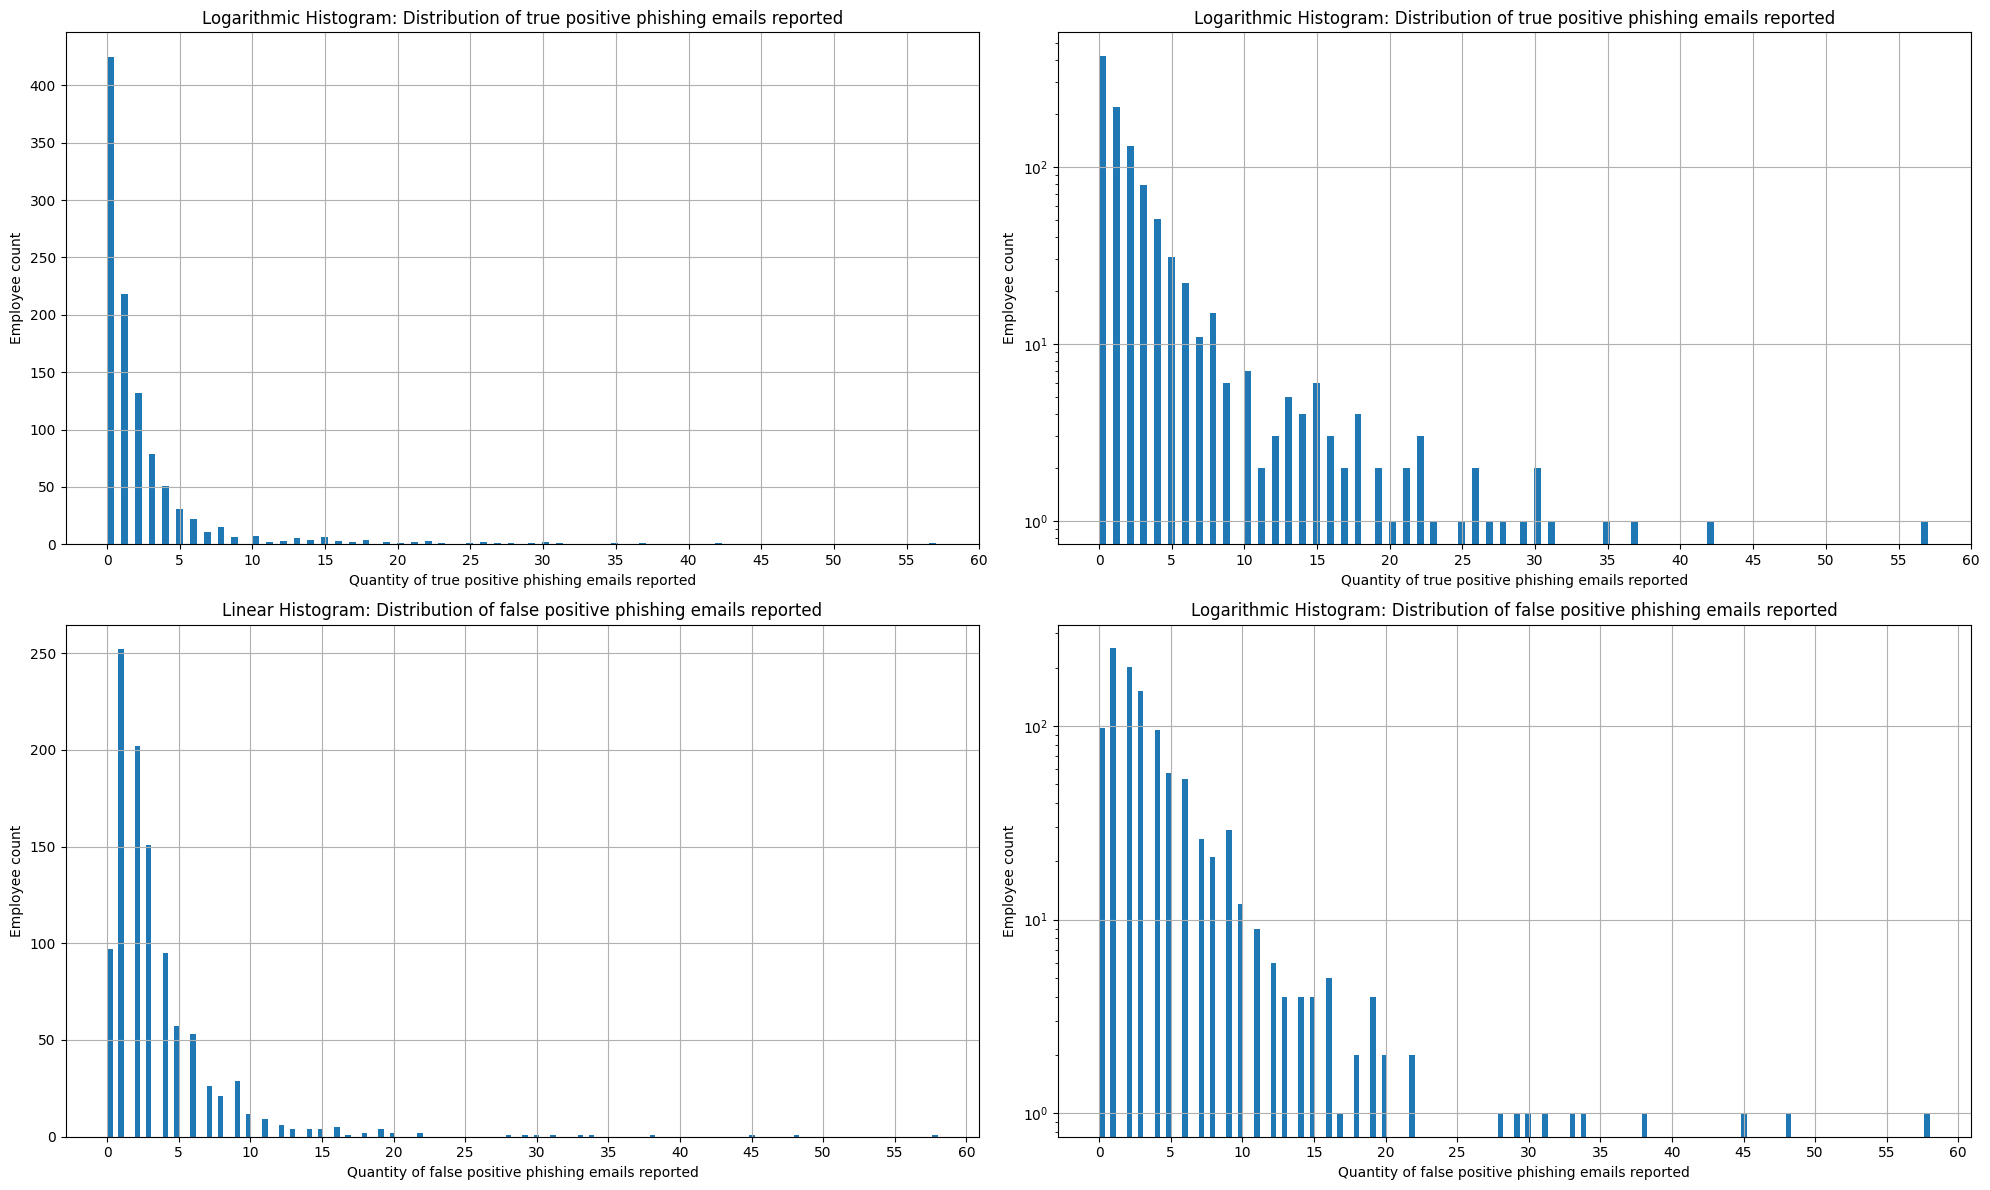

In [44]:
#Create new dataframe 'truepositive_df' to hold values for accurately reported phishing emails for charting. 
#It is possibly to update the filtering and modifying the charts by changing the parameter '>= 0' to filter out more content 
truepositive_df = selected_df[selected_df['real_truepositive'] >= 0]
tp_min_val = truepositive_df['real_truepositive'].min()
tp_max_val = truepositive_df['real_truepositive'].max()

#Create new dataframe 'falsepositive_df' to hold values for accurately reported phishing emails for charting. 
falsepositive_df = selected_df[selected_df['real_falsepositive'] >= 0]
fp_min_val = falsepositive_df['real_falsepositive'].min()
fp_max_val = falsepositive_df['real_falsepositive'].max()

#Create the figure and two subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

#Create a histogram of real true positive reports using the default linear scale in plot '00'
truepositive_df[['real_truepositive']].hist(ax=axes[0][0], bins=120)
#Set labels and titles for plot '00'
axes[0][0].set_xlabel('Quantity of true positive phishing emails reported')
axes[0][0].set_ylabel('Employee count')
axes[0][0].set_title('Logarithmic Histogram: Distribution of true positive phishing emails reported')
#Set xticks as a calculated range based on min and max values
axes[0][0].set_xticks(range(tp_min_val, tp_max_val + 5, 5))

#Create a histogram of real true positive reports using a logarithmic scale in plot '01'
truepositive_df[['real_truepositive']].hist(ax=axes[0][1], bins=120, log=True)
#Set labels and titles for plot '01'
axes[0][1].set_xlabel('Quantity of true positive phishing emails reported')
axes[0][1].set_ylabel('Employee count')
axes[0][1].set_title('Logarithmic Histogram: Distribution of true positive phishing emails reported')
#Set xticks as a calculated range based on min and max values
axes[0][1].set_xticks(range(tp_min_val, tp_max_val + 5, 5))

#Create a histogram real false positive reports using the default linear scale in plot '10'
falsepositive_df[['real_falsepositive']].hist(ax=axes[1][0], bins=150)
#Set labels and titles for plot '10'
axes[1][0].set_xlabel('Quantity of false positive phishing emails reported')
axes[1][0].set_ylabel('Employee count')
axes[1][0].set_title('Linear Histogram: Distribution of false positive phishing emails reported')
#Set xticks as a calculated range based on min and max values
axes[1][0].set_xticks(range(fp_min_val, fp_max_val + 5, 5))

#Create a histogram of real true positive reports using a logarithmic scale in plot '11'
falsepositive_df[['real_falsepositive']].hist(ax=axes[1][1], bins=150, log=True)
#Set labels and titles for plot '11'
axes[1][1].set_xlabel('Quantity of false positive phishing emails reported')
axes[1][1].set_ylabel('Employee count')
axes[1][1].set_title('Logarithmic Histogram: Distribution of false positive phishing emails reported')
#Set xticks as a calculated range based on min and max values
axes[1][1].set_xticks(range(fp_min_val, fp_max_val + 5, 5))

# Show the plot
plt.tight_layout()
plt.show()

In the plots above, we can see that using a logarithmic display we can more easily see and appreciate the decaying slope. Majority of users are reporting only a handful of emails. almost 1/3 did not report any during the time period.

In [45]:
#Create a new dataframe to hold new calculated values for exploration and analysis

#group by 'test_sum_Reported' column and calculate the sum of 'real_truepositive'
sum_true_positive = selected_df.groupby('test_sum_Reported')['real_truepositive'].sum().reset_index()
#rename the columns for clearness
sum_true_positive.columns = ['test_sum_Reported', 'sum_real_truepositive']
#display the new dataframe
#print(sum_true_positive)

#group by 'test_sum_Reported' column and calculate the sum of 'real_falsepositive'
sum_false_positive = selected_df.groupby('test_sum_Reported')['real_falsepositive'].sum().reset_index()
#rename the columns for clearness
sum_false_positive.columns = ['test_sum_Reported','sum_real_falsepositive']
#display the new dataframe
#print(sum_false_positive)

#count the quantity of each value in the 'test_sum_Reported' column
reported_test_counts = selected_df['test_sum_Reported'].value_counts().reset_index()
#rename the columns for clearness
reported_test_counts.columns = ['test_sum_Reported', 'user_count']
#sort dataframe on column 'test_sum_Reported'
reported_test_counts = reported_test_counts.sort_values(by='test_sum_Reported', ascending=True)

#display the new dataframe
#print(reported_test_counts)

#join 'reported_test_counts' and 'sum_false_positive' on 'test_sum_reported' column
merged_df = pd.merge(reported_test_counts, sum_false_positive, on='test_sum_Reported', how='outer')

#join merged_df with 'sum_true_positive' on the 'test_sum_reported' column
merged_df = pd.merge(merged_df, sum_true_positive, on='test_sum_Reported', how='outer')

#calculate new columns (avg_real_falsepositive, avg_real_truepositive) based on merged_df
merged_df['avg_real_falsepositive'] = (merged_df['sum_real_falsepositive'] / merged_df['user_count']).round(1)
merged_df['avg_real_truepositive'] = (merged_df['sum_real_truepositive'] / merged_df['user_count']).round(1)

#display the new dataframe
display(merged_df)

,test_sum_Reported,user_count,sum_real_falsepositive,sum_real_truepositive,avg_real_falsepositive,avg_real_truepositive
0,0,39,69,23,1.8,0.6
1,1,59,111,51,1.9,0.9
2,2,74,206,106,2.8,1.4
3,3,67,173,189,2.6,2.8
4,4,92,248,258,2.7,2.8
5,5,115,350,296,3.0,2.6
6,6,148,563,376,3.8,2.5
7,7,152,577,373,3.8,2.5
8,8,148,814,370,5.5,2.5
9,9,128,609,469,4.8,3.7


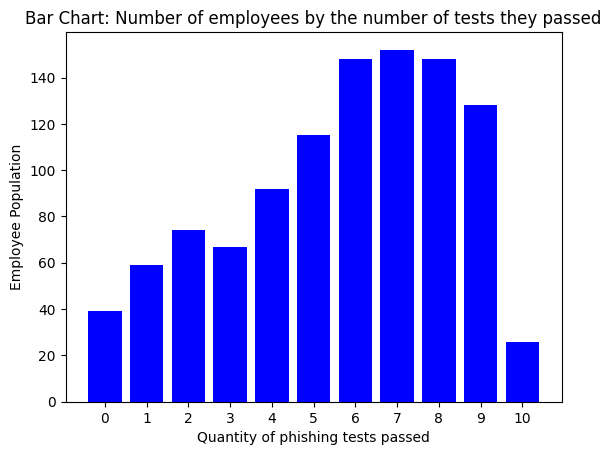

In [46]:
#Generate a bar chart showing the distribution of the employee population based on the number of tests passed
plt.bar(merged_df['test_sum_Reported'], merged_df['user_count'], color='blue')
#Set labels and title for the plot
plt.xlabel('Quantity of phishing tests passed')
plt.ylabel('Employee Population')
plt.title('Bar Chart: Number of employees by the number of tests they passed')
#Set xticks to sum of reports
plt.xticks(merged_df['test_sum_Reported'])
#Display the plot
plt.show()


We can see that the number of employees who passed 11 tests is an extremely small population compared to the other columns. This row may need to be removed as an outlier for best results.

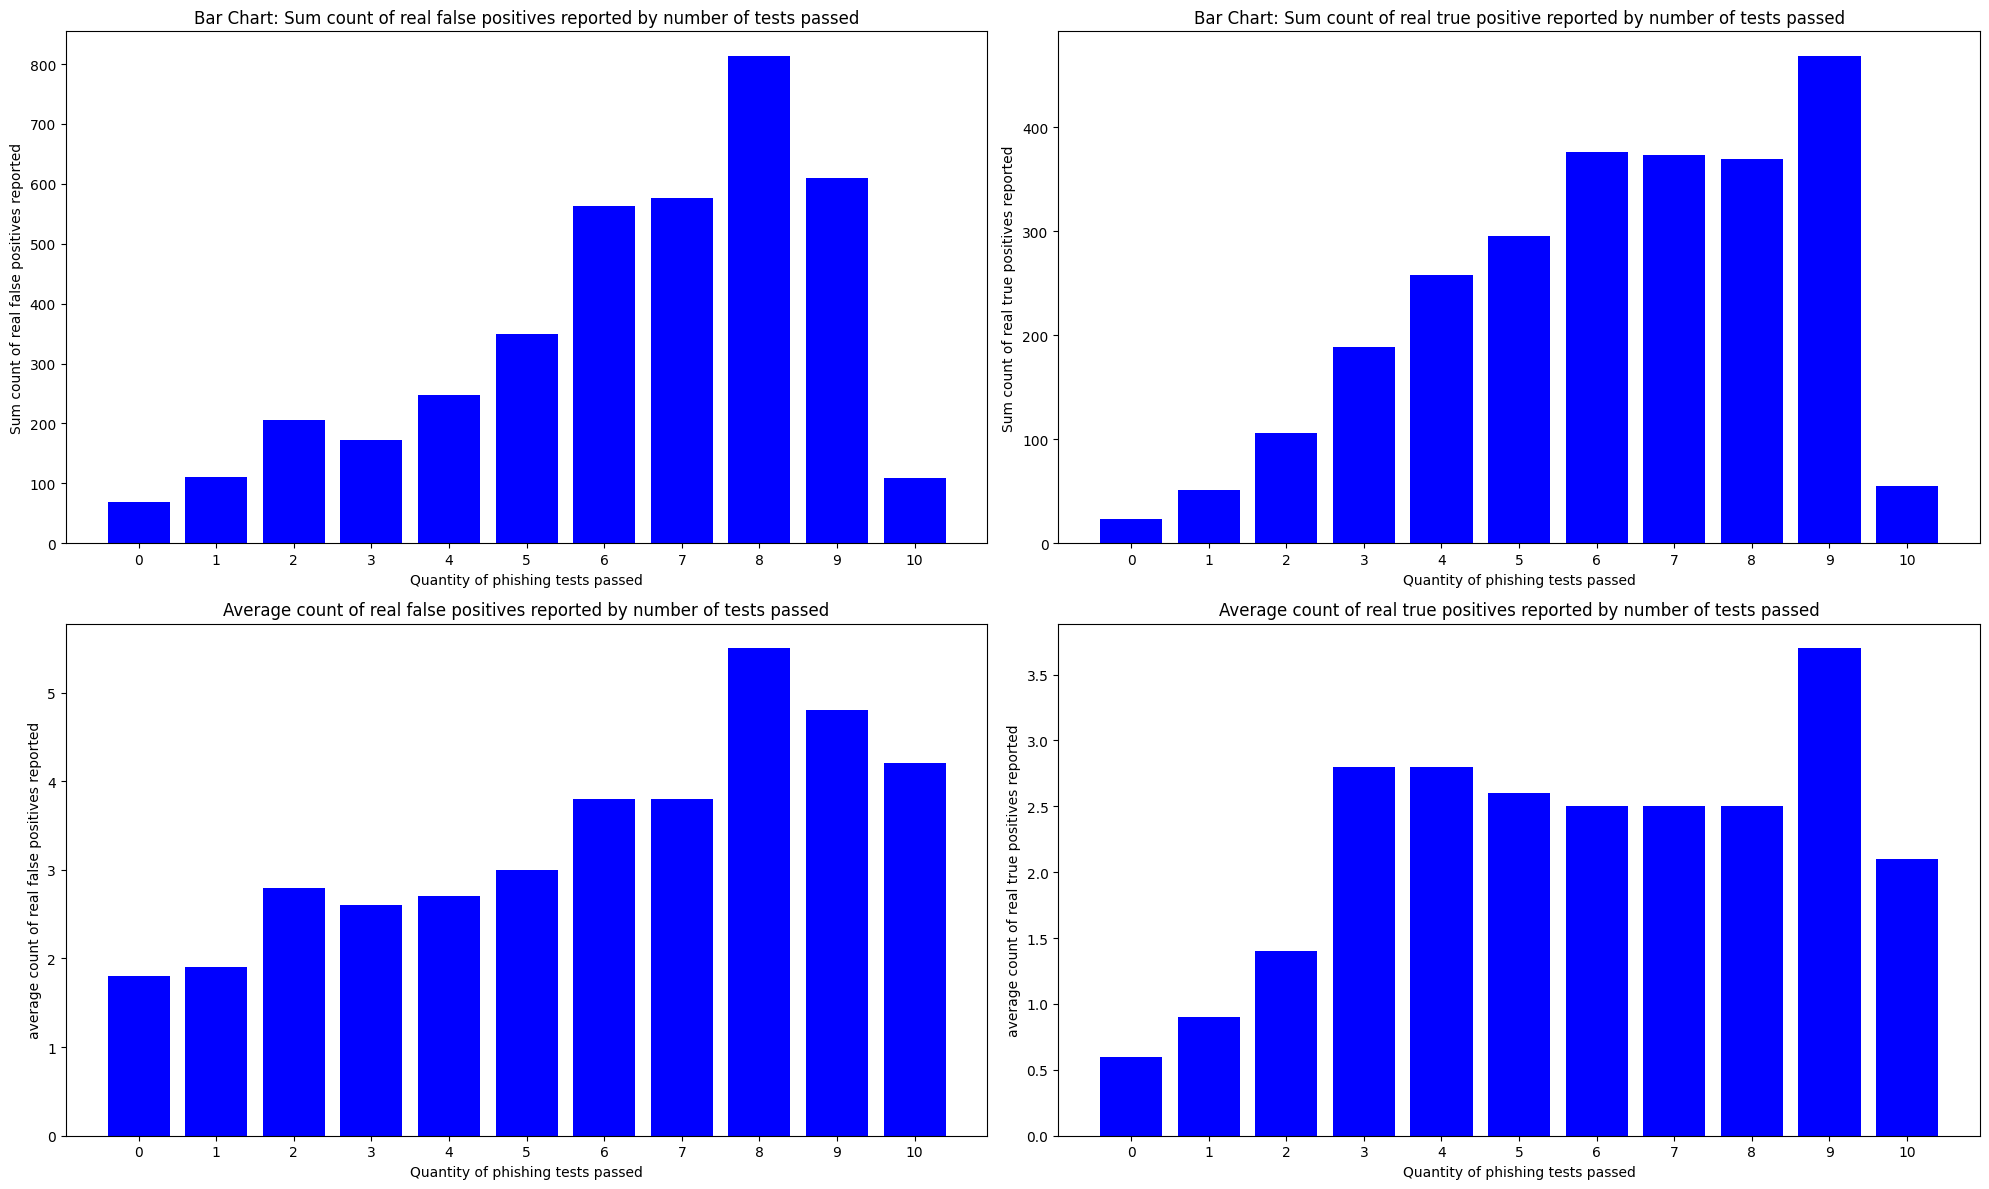

In [47]:
#Calculate min and max values for x axis
tsr_min_val = merged_df['test_sum_Reported'].min()
tsr_max_val = merged_df['test_sum_Reported'].max()

#Create the figure and two subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

#Create a bar chart of summed real false positive reports by test passes
axes[0][0].bar(merged_df['test_sum_Reported'], merged_df['sum_real_falsepositive'], color='blue')
#Set labels and titles for plot
axes[0][0].set_xlabel('Quantity of phishing tests passed')
axes[0][0].set_ylabel('Sum count of real false positives reported')
axes[0][0].set_title('Bar Chart: Sum count of real false positives reported by number of tests passed')
#Set ticks for x axis
axes[0][0].set_xticks(range(tsr_min_val, tsr_max_val + 1, 1))

#Create a bar chart of summed real true positive reports by test passes
axes[0][1].bar(merged_df['test_sum_Reported'], merged_df['sum_real_truepositive'], color='blue')
#Set labels and titles for plot
axes[0][1].set_xlabel('Quantity of phishing tests passed')
axes[0][1].set_ylabel('Sum count of real true positives reported')
axes[0][1].set_title('Bar Chart: Sum count of real true positive reported by number of tests passed')
#Set ticks for x axis
axes[0][1].set_xticks(range(tsr_min_val, tsr_max_val + 1, 1))


#Create a bar chart of average real false positive reports by test passes
axes[1][0].bar(merged_df['test_sum_Reported'], merged_df['avg_real_falsepositive'], color='blue')
#Set labels and titles for plot
axes[1][0].set_xlabel('Quantity of phishing tests passed')
axes[1][0].set_ylabel('average count of real false positives reported')
axes[1][0].set_title('Average count of real false positives reported by number of tests passed')
#Set ticks for x axis
axes[1][0].set_xticks(range(tsr_min_val, tsr_max_val + 1, 1))

#Create a bar chart of average real true positive reports by test passes
axes[1][1].bar(merged_df['test_sum_Reported'], merged_df['avg_real_truepositive'], color='blue')
#Set labels and titles for plot
axes[1][1].set_xlabel('Quantity of phishing tests passed')
axes[1][1].set_ylabel('average count of real true positives reported')
axes[1][1].set_title('Average count of real true positives reported by number of tests passed')
#Set ticks for x axis
axes[1][1].set_xticks(range(tsr_min_val, tsr_max_val + 1, 1))

#Display the plot
plt.tight_layout()
plt.show()

In the charts above, I believe charting the average counts provides a more accurate understanding on an individual level. It would be wise to filter out some outliers such as the row with 11 test passes as the population is so small. 

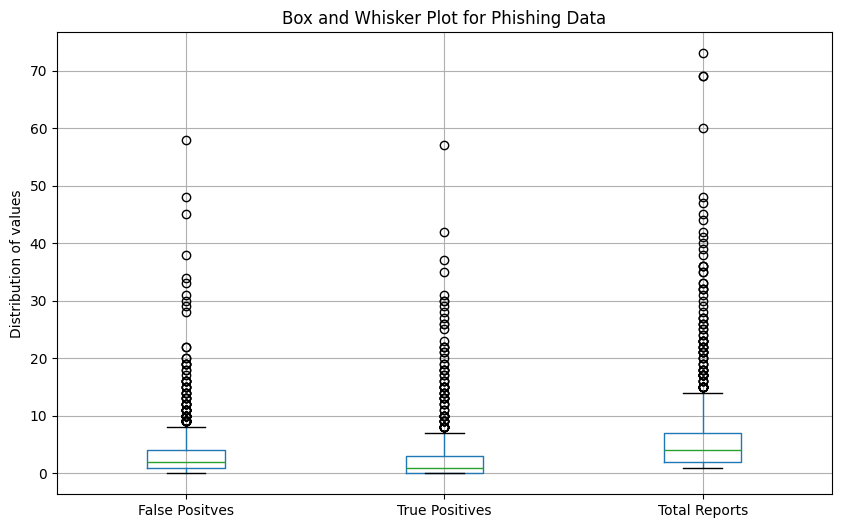

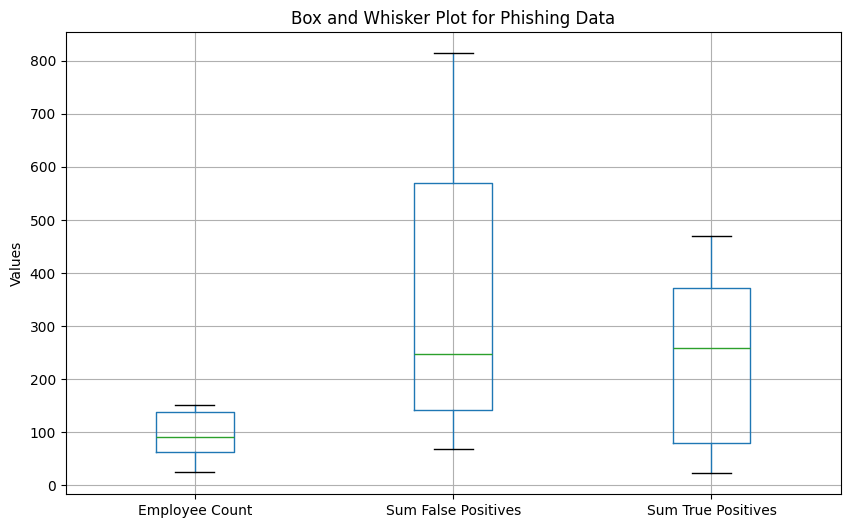

In [48]:
#Create a whisker graph of chosen numerical columns
#removed columns for better visual 'test_sum_failures','test_sum_Clicked','test_sum_Reported'
whisker_df = selected_df[['real_falsepositive','real_truepositive','real_total_reports']]
#Create figure and plot
whisker_df = whisker_df.rename(columns={"real_falsepositive": "False Positves", "real_truepositive": "True Positives", "real_total_reports": "Total Reports"})
whisker_df.boxplot(figsize=(10, 6))
#Set title and labels and ticks
plt.title('Box and Whisker Plot for Phishing Data')
plt.ylabel('Distribution of values')
plt.xticks(rotation=00)
#Show plot
plt.show()

#Create a whisker graph of chosen numerical columns
#removed columns for better visuals: 'avg_real_falsepositive','avg_real_truepositive'
whisker_df2 = merged_df[['user_count','sum_real_falsepositive','sum_real_truepositive']]
whisker_df2 = whisker_df2.rename(columns={"user_count": "Employee Count", "sum_real_falsepositive": "Sum False Positives", "sum_real_truepositive": "Sum True Positives"})
whisker_df2.boxplot(figsize=(10, 6))
#Set title and labels and ticks
plt.title('Box and Whisker Plot for Phishing Data')
plt.ylabel('Values')
plt.xticks(rotation=0)
#Show plot
plt.show()

This second graph shows wider distribution of false positive emails than true positives.

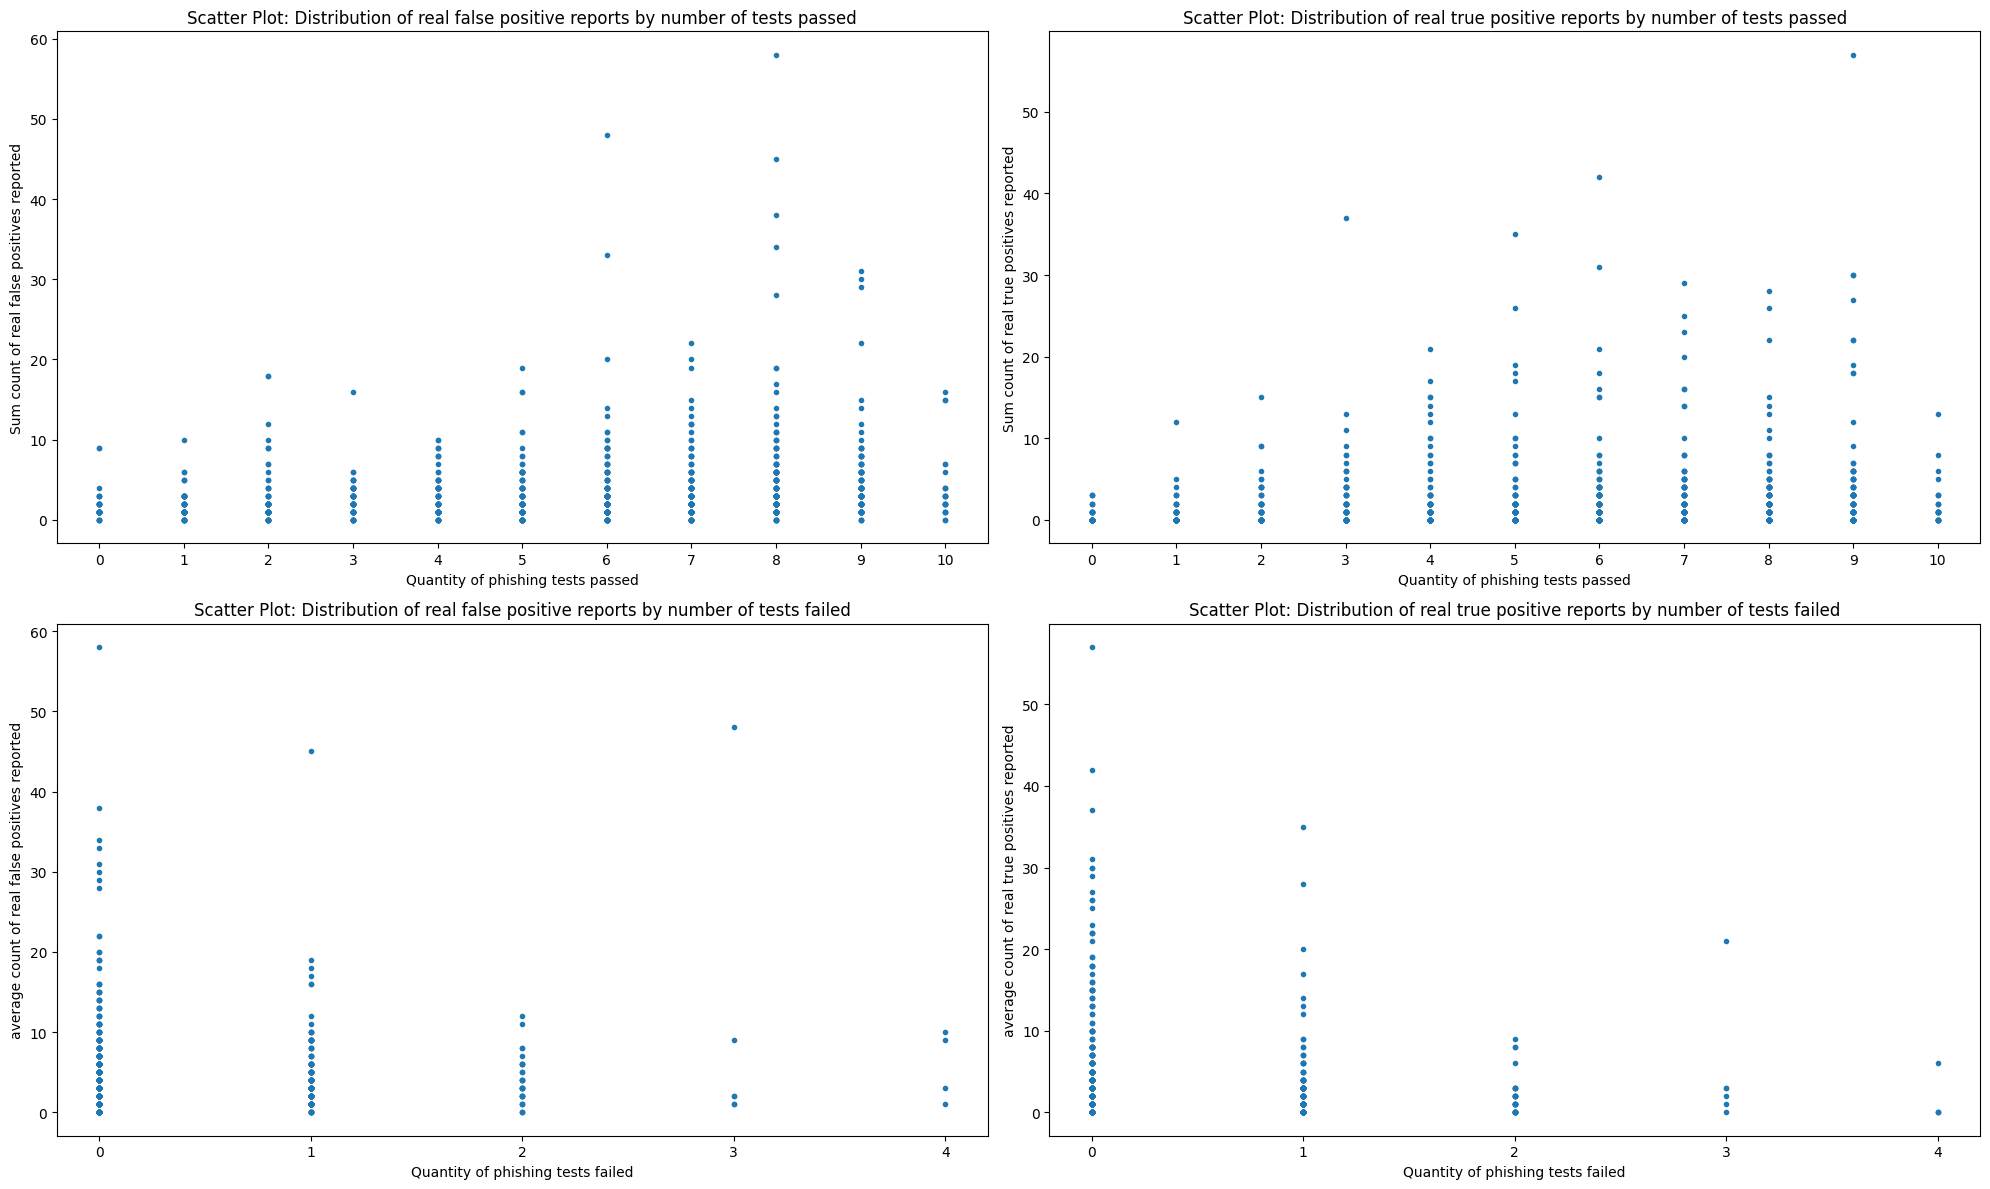

In [49]:
#Calculate values for X axis min and max
tsr_min_val = selected_df['test_sum_Reported'].min()
tsr_max_val = selected_df['test_sum_Reported'].max()
tsf_min_val = selected_df['test_sum_failures'].min()
tsf_max_val = selected_df['test_sum_failures'].max()

#Create the figure and two subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

#Create a bar chart of summed real false positive reports by test passes
axes[0][0].plot(selected_df['test_sum_Reported'], df['real_falsepositive'], '.')
#Set labels and titles for plot
axes[0][0].set_xlabel('Quantity of phishing tests passed')
axes[0][0].set_ylabel('Sum count of real false positives reported')
axes[0][0].set_title('Scatter Plot: Distribution of real false positive reports by number of tests passed')
#Set ticks for x axis
axes[0][0].set_xticks(range(tsr_min_val, tsr_max_val + 1, 1))

#Create a bar chart of summed real true positive reports by test passes
axes[0][1].plot(selected_df['test_sum_Reported'], df['real_truepositive'], '.')
#Set labels and titles for plot
axes[0][1].set_xlabel('Quantity of phishing tests passed')
axes[0][1].set_ylabel('Sum count of real true positives reported')
axes[0][1].set_title('Scatter Plot: Distribution of real true positive reports by number of tests passed')
#Set ticks for x axis
axes[0][1].set_xticks(range(tsr_min_val, tsr_max_val + 1, 1))


#Create a bar chart of average real false positive reports by test passes
axes[1][0].plot(selected_df['test_sum_failures'], df['real_falsepositive'], '.')
#Set labels and titles for plot
axes[1][0].set_xlabel('Quantity of phishing tests failed')
axes[1][0].set_ylabel('average count of real false positives reported')
axes[1][0].set_title('Scatter Plot: Distribution of real false positive reports by number of tests failed')
#Set ticks for x axis
axes[1][0].set_xticks(range(tsf_min_val, tsf_max_val + 1, 1))

#Create a bar chart of average real true positive reports by test passes
axes[1][1].plot(selected_df['test_sum_failures'], df['real_truepositive'], '.')
#Set labels and titles for plot
axes[1][1].set_xlabel('Quantity of phishing tests failed')
axes[1][1].set_ylabel('average count of real true positives reported')
axes[1][1].set_title('Scatter Plot: Distribution of real true positive reports by number of tests failed')
#Set ticks for x axis
axes[1][1].set_xticks(range(tsf_min_val, tsf_max_val + 1, 1))

# Show the plot
plt.tight_layout()
plt.show()

This chart seems to show that measuring by the number of test passes may be better for analysis due to the large volume and variety.

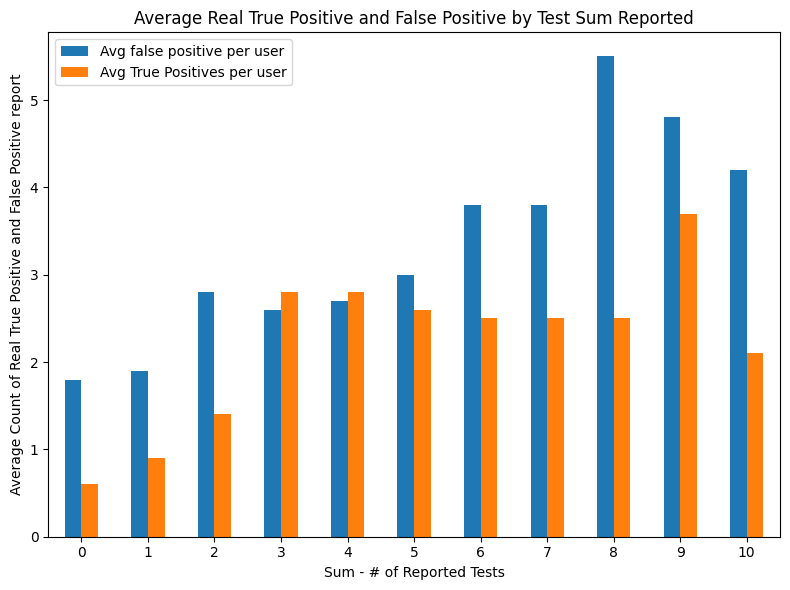

In [50]:
#Create new dataframe for double bar chart
doublebar_df = merged_df[['test_sum_Reported','avg_real_falsepositive','avg_real_truepositive']]
doublebar_df = doublebar_df.rename(columns={"avg_real_falsepositive": "Avg false positive per user", "avg_real_truepositive": "Avg True Positives per user"})
#Set 'test_sum_Reported' as the index
doublebar_df.set_index('test_sum_Reported', inplace=True)
#create plot from new dataframe
ax = doublebar_df.plot(kind='bar', figsize=(8, 6), rot=0)
#Set the labels and title
ax.set_xlabel('Sum - # of Reported Tests')
ax.set_ylabel('Average Count of Real True Positive and False Positive report')
ax.set_title('Average Real True Positive and False Positive by Test Sum Reported')

#Display the plot
plt.tight_layout()
plt.show()

Double bar chart does show a general increasing trend in the number of emails reported based on the number of tests passes. Last column (11) as an outlier and could be removed.

In [51]:
#Create new dataframe to hold only numeric columns for comparison
correlationdf = selected_df.corr(numeric_only=True)

#Initialized variable 'highest_corr' to keep track of the highest correlation column
highest_corr = 0
#Iterate through the dataframe
for col in correlationdf:
    for row in correlationdf[col]:
        #find the highest value that is not equal to 1
        if abs(row) > abs(highest_corr) and abs(row) != 1:
            #Set variables to display
            highest_corr = row
            column = col
#Display out
print(highest_corr)
print(correlationdf[column])

0.976053742803117
EmployeeId               -0.069767
test_sum_failures        -0.148005
test_sum_Clicked         -0.148005
test_sum_Reported         1.000000
test_total_engagements    0.976054
real_falsepositive        0.205858
real_truepositive         0.110161
real_total_reports        0.197844
real_DwellTime            0.169014
avg_dwell_time            0.052210
duplicated                     NaN
Name: test_sum_Reported, dtype: float64


This calculation shows that the column 'test_total_engagements' has the highest correlation with other columns in the dataframe.

21.76850341507462
0.05178356774941961


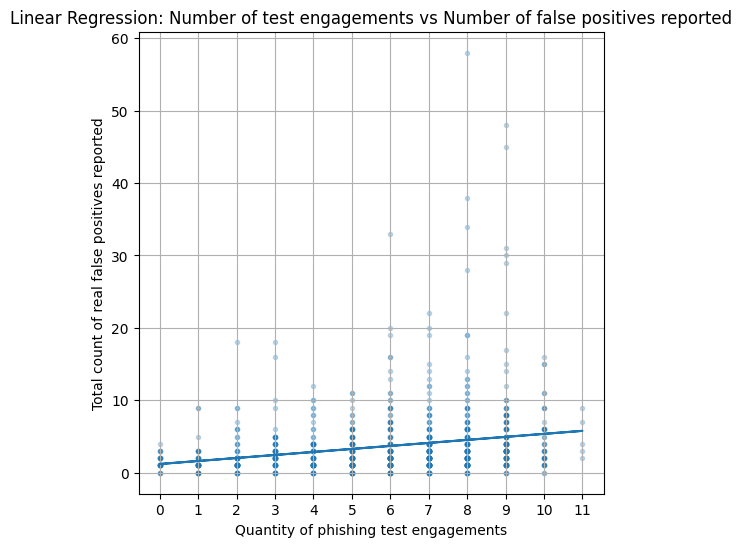

In [52]:
#Calculate min and max for xticks
tte_min=selected_df['test_total_engagements'].min()
tte_max=selected_df['test_total_engagements'].max()
#Select columns to analyze
X = selected_df[['test_total_engagements']]
y = selected_df['real_falsepositive']
#Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

#Create prediction model from 'test_total_engagements'
pred = model.predict(selected_df[['test_total_engagements']])

#Create figure and plots
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(selected_df['test_total_engagements'],pred)
ax.scatter(selected_df['test_total_engagements'], selected_df['real_falsepositive'], alpha=.25, marker='.')
ax.grid(True)
ax.set_xlabel('Quantity of phishing test engagements')
ax.set_ylabel('Total count of real false positives reported')
ax.set_title('Linear Regression: Number of test engagements vs Number of false positives reported')
#Set ticks for x axis
ax.set_xticks(range(tte_min,tte_max+1,1))

#Calculate and display MSE and R2 scores
print(mean_squared_error(selected_df['real_falsepositive'], pred))
print(r2_score(selected_df['real_falsepositive'], pred))

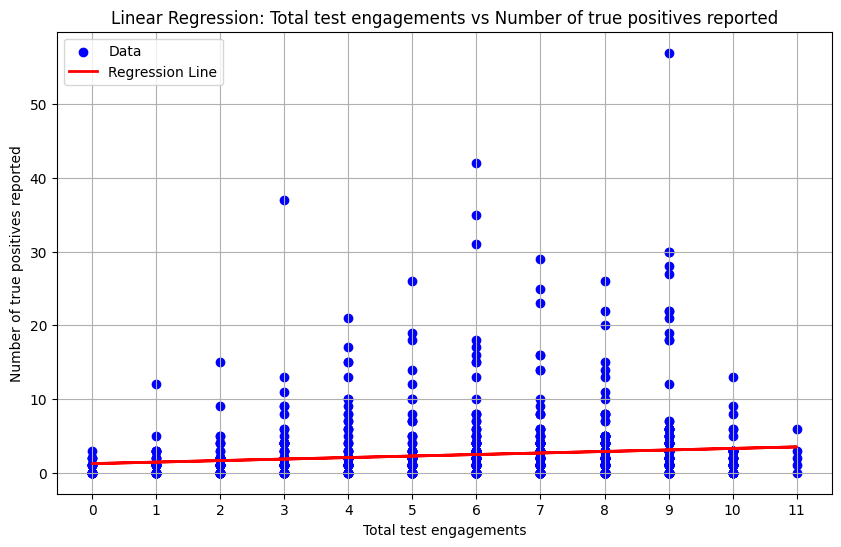

In [53]:
#Calculate min and max for xticks
tte_min=selected_df['test_total_engagements'].min()
tte_max=selected_df['test_total_engagements'].max()
#Select columns to analyze
X = selected_df[['test_total_engagements']]
y = selected_df['real_truepositive']
#Create and fit linear regression model
model = LinearRegression()
model.fit(X, y)
#Predict y values
y_pred = model.predict(X)

#Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
#Set chart titles and labels
plt.title('Linear Regression: Total test engagements vs Number of true positives reported')
plt.xlabel('Total test engagements')
plt.ylabel('Number of true positives reported')
plt.xticks(range(tte_min,tte_max+1,1))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Positive correlation but is weak. 

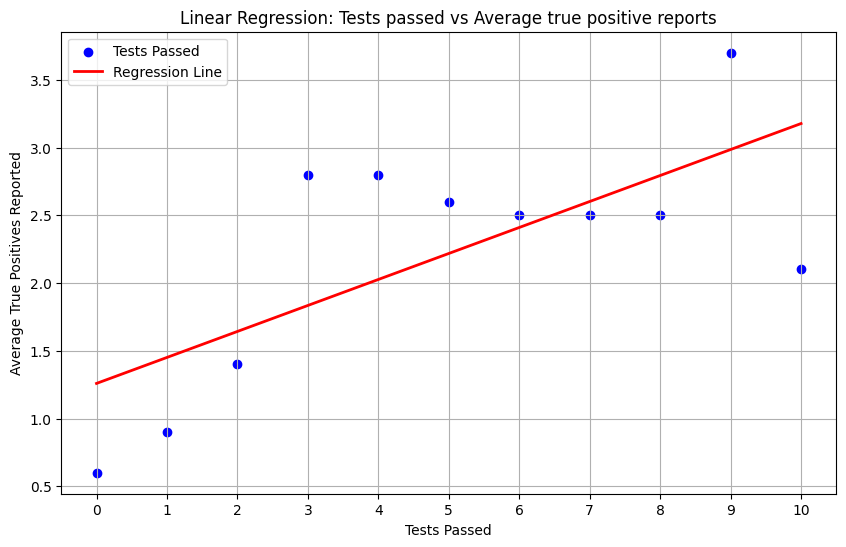

In [54]:
#Calculate min and max for column 'test_sum_Reported' for x axis ticks
tsr_min=selected_df['test_sum_Reported'].min()
tsr_max=selected_df['test_sum_Reported'].max()
#Reshape data
X = merged_df[['test_sum_Reported']]
y = merged_df['avg_real_truepositive']
#Fit linear regression model
model = LinearRegression()
model.fit(X, y)
#Predict y values
y_pred = model.predict(X)
#Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Tests Passed')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
#Set chart titles and labels
plt.title('Linear Regression: Tests passed vs Average true positive reports')
plt.xlabel('Tests Passed')
plt.ylabel('Average True Positives Reported')
plt.xticks(range(tsr_min,tsr_max+1,1))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

The regression line does show a positive up trend. As the user passes more phishing tests, they do appear to report more true positive phishing emails on average.

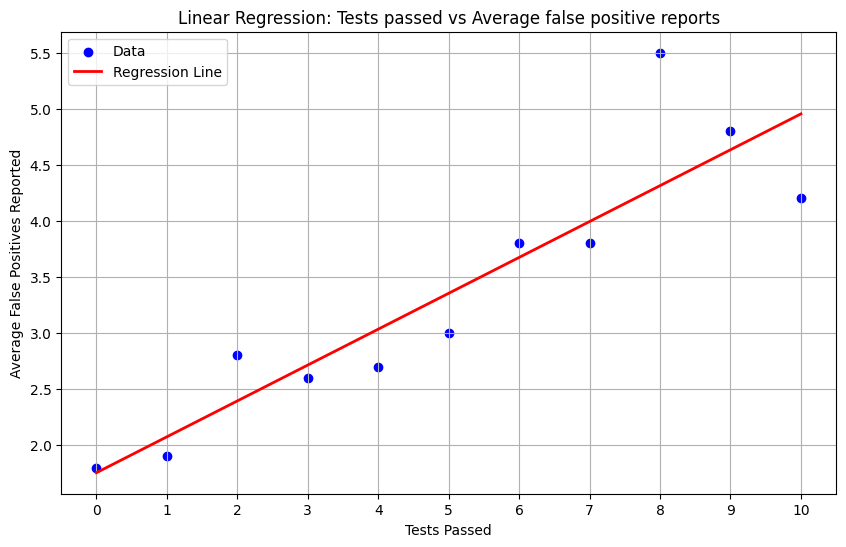

In [55]:
#calculate min and max for column 'test_sum_Reported' for x axis ticks
tsr_min=selected_df['test_sum_Reported'].min()
tsr_max=selected_df['test_sum_Reported'].max()
# Reshape data
X = merged_df[['test_sum_Reported']]
y = merged_df['avg_real_falsepositive']
# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
# Predict y values
y_pred = model.predict(X)
# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
#Set chart titles and labels
plt.title('Linear Regression: Tests passed vs Average false positive reports')
plt.xlabel('Tests Passed')
plt.ylabel('Average False Positives Reported')
plt.xticks(range(tsr_min,tsr_max+1,1))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

The regression line does show a strong positive up trend. As the user passes more phishing tests, they do appear to report more false positive phishing emails on average.

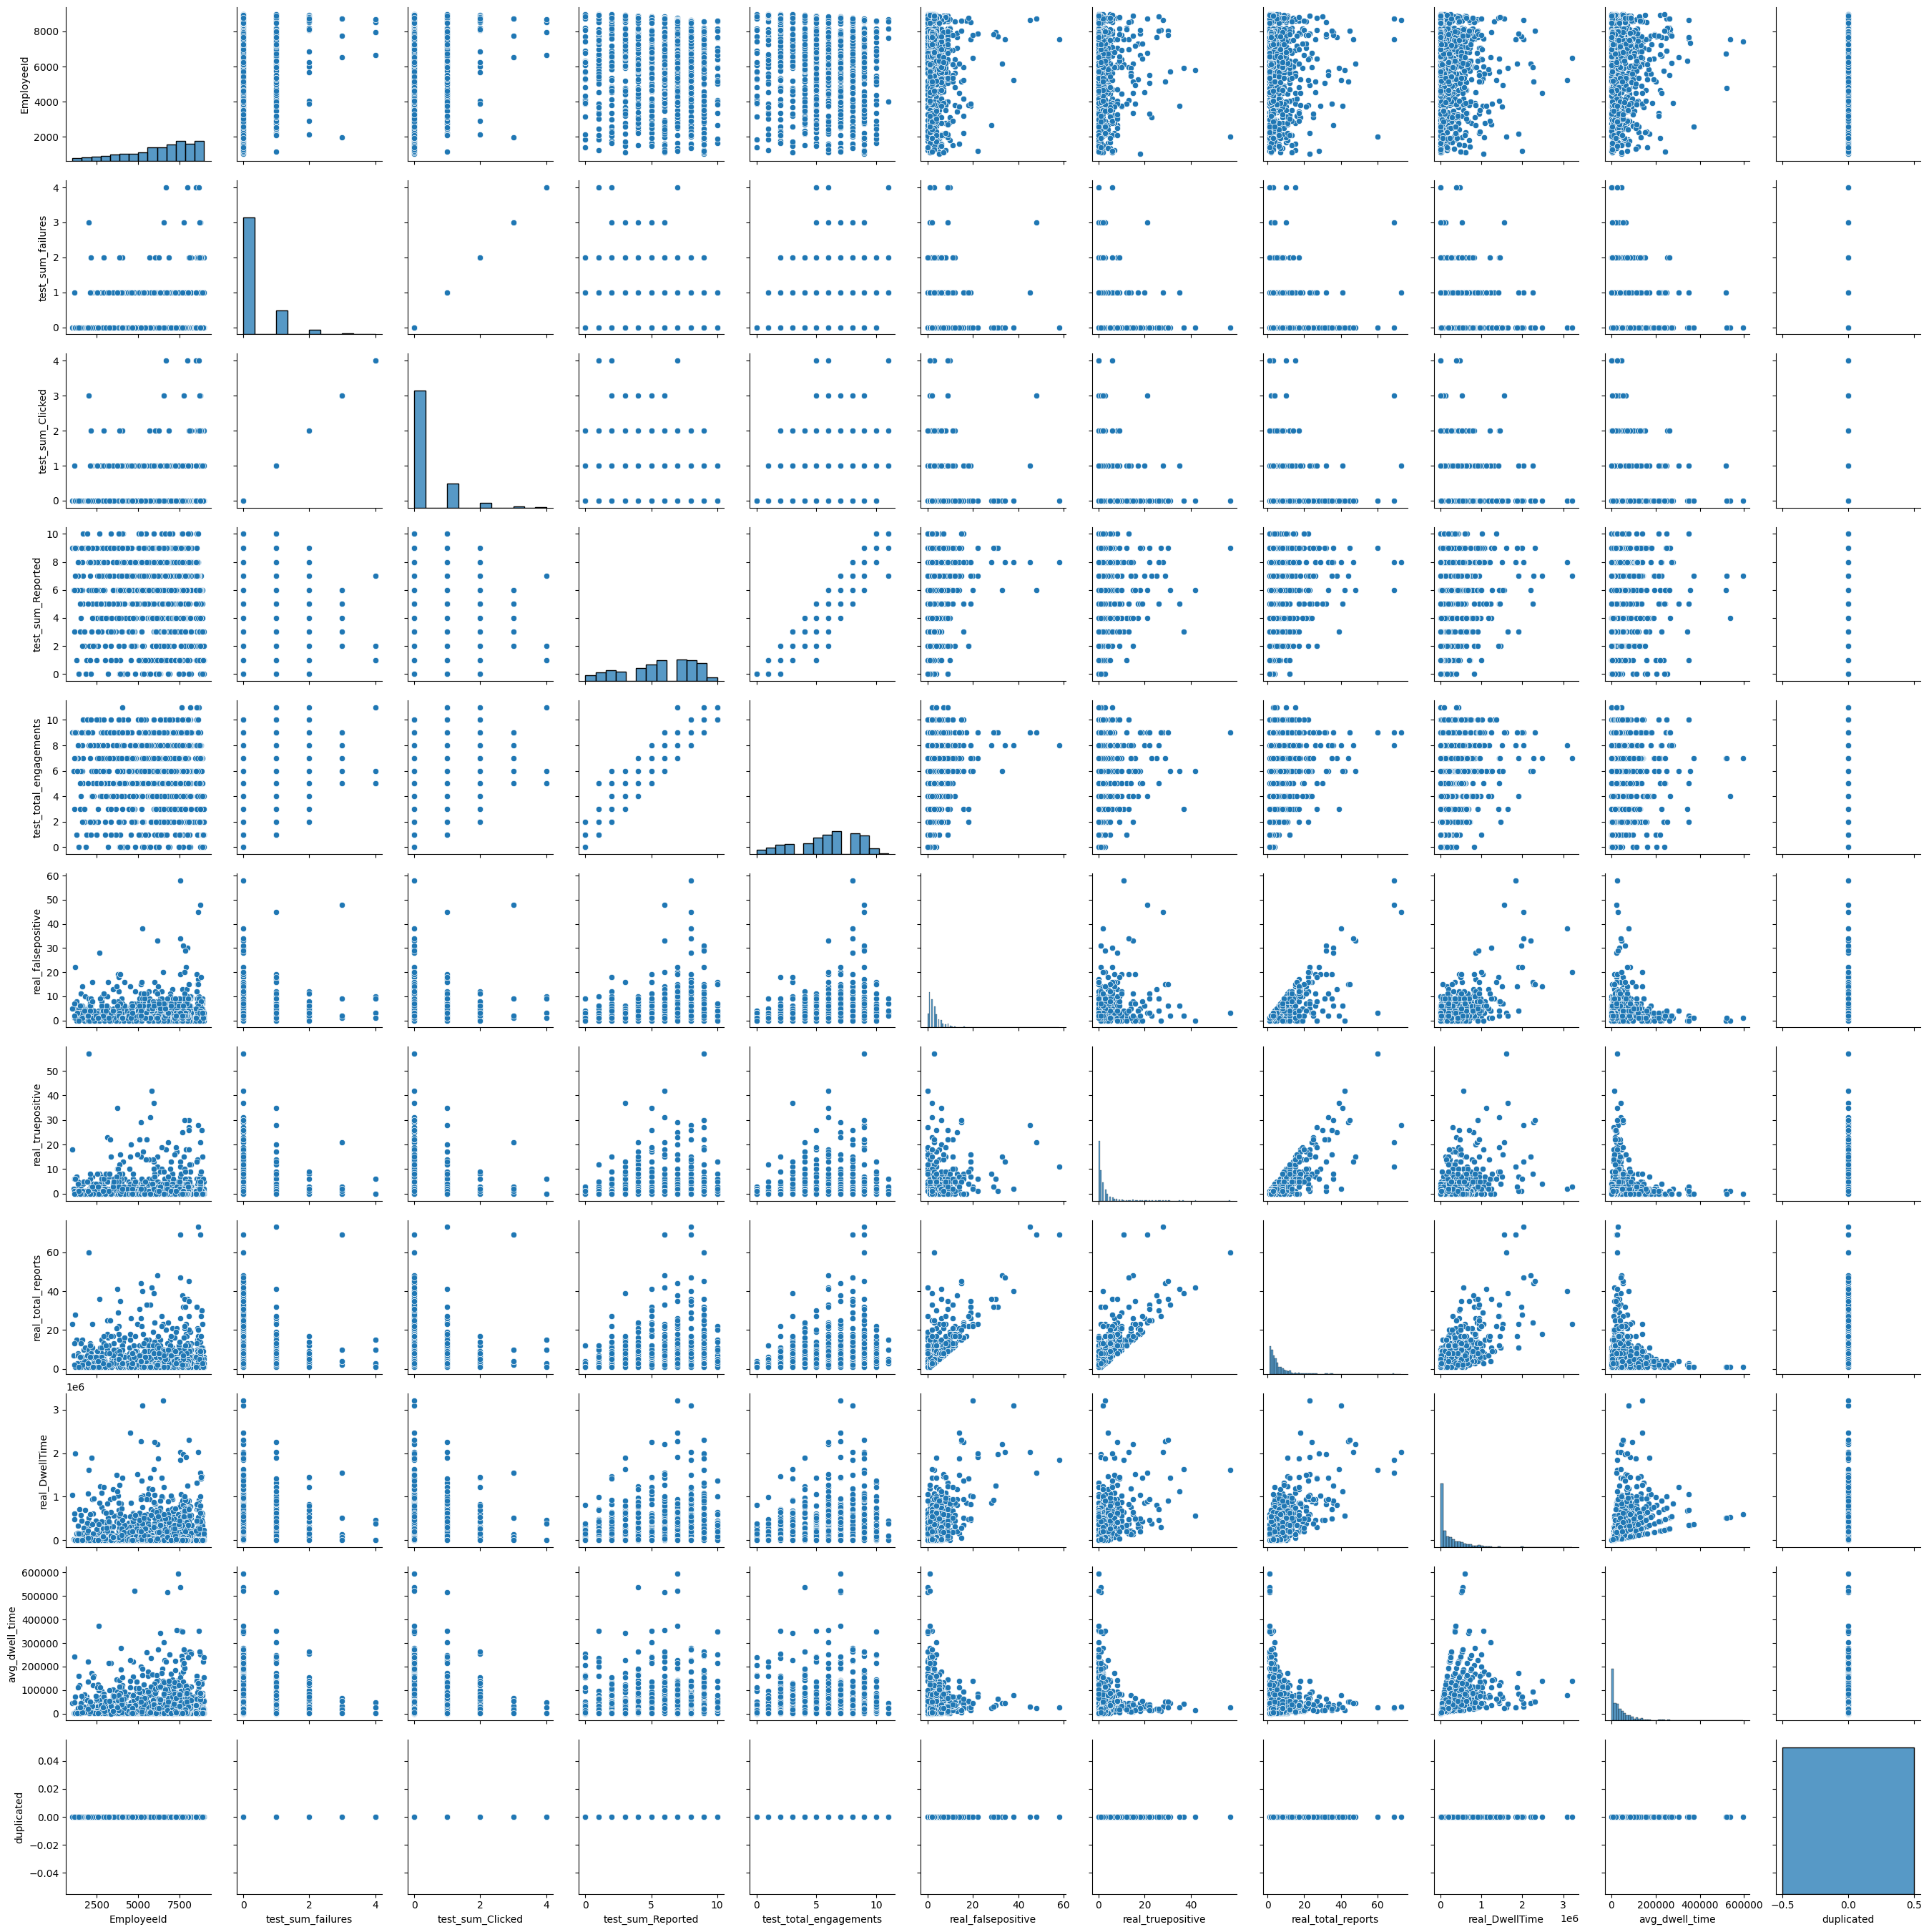

In [56]:
#Generate a parplot from the selected columns/dataframe
sns.pairplot(selected_df)

The bottom right quadrant shows some interesting column pairs to inspect.

c:\Users\Nate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 2000 with accuracies 
[1.86118612e-14 3.71876675e-06 4.13836988e-06 3.60188986e-05]
not reaching the requested tolerance 1.5616416931152344e-05.
Use iteration 1888 instead with accuracy 
9.81430524866323e-06.

  _, diffusion_map = lobpcg(
c:\Users\Nate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.09785579e-14 3.81080828e-06 4.19362277e-06 3.12527898e-05]
not reaching the requested tolerance 1.5616416931152344e-05.
  _, diffusion_map = lobpcg(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


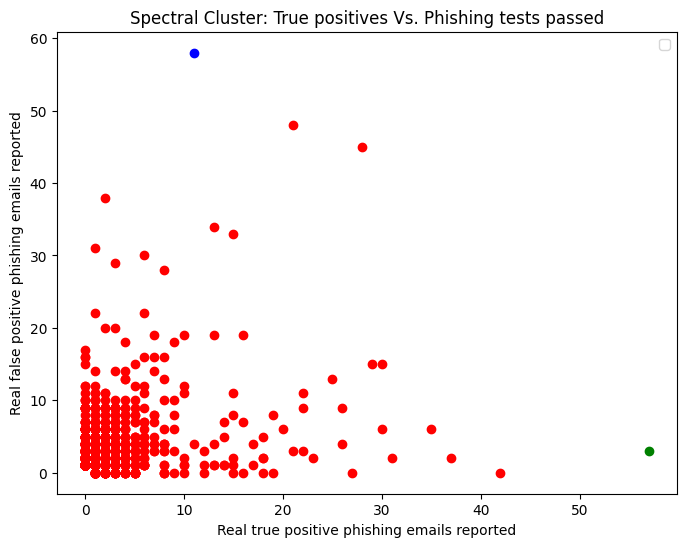

In [57]:
#Create spectralclustering model, set number of clusters
affinity = SpectralClustering(n_clusters=3)
#Removed 'test_sum_failures','test_sum_Reported'
#Choose columns to analyze and fit data
clustering = affinity.fit(selected_df[['real_truepositive','real_falsepositive']])
#Create figure and axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
#Set list of colors for clusters
colors = ['r', 'g', 'b']

#Iterate through the data within the chosen columns and plot it
for i in range(len(selected_df)):
    ax.scatter(selected_df["real_truepositive"].iloc[i], selected_df['real_falsepositive'].iloc[i], color=colors[clustering.labels_[i]])

#Set labels and title
ax.set_xlabel('Real true positive phishing emails reported')
ax.set_ylabel('Real false positive phishing emails reported')
ax.set_title("Spectral Cluster: True positives Vs. Phishing tests passed")
plt.legend()
plt.show()

The clustering analysis indicates that most people fall into the first cluster, but a second and third population has started to appear. It is possible that these latter populations may be bigger if outliers had not been removed. Or it could indicate additional outliers that could be removed. 

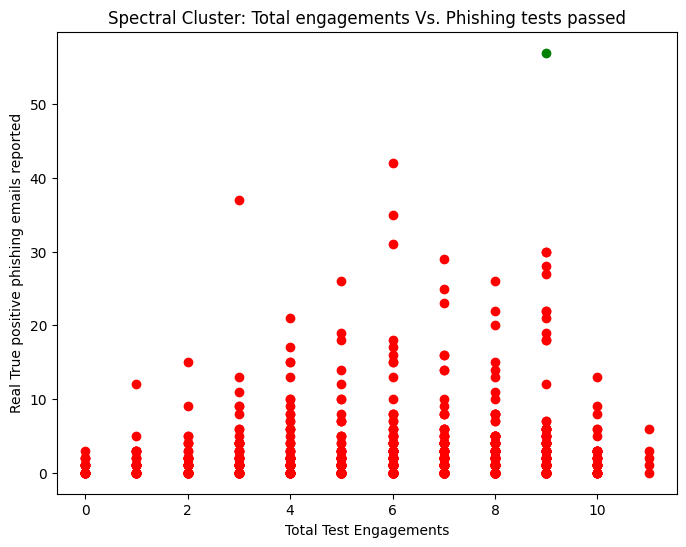

In [58]:
#Create spectral clustering model, set number of clusters
affinity = SpectralClustering(n_clusters=2)
#Removed 'test_sum_failures','test_sum_Reported','test_total_engagements'
#Choose columns to analyze and fit data
clustering = affinity.fit(selected_df[['test_total_engagements','real_truepositive']])
#Create figure and axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
#Set list of colors for clusters
colors = ['r', 'g']

#Iterate through the data within the chosen columns and plot it
for i in range(len(selected_df)):
    ax.scatter(selected_df["test_total_engagements"].iloc[i], selected_df['real_truepositive'].iloc[i], color=colors[clustering.labels_[i]])

#Set labels and title
ax.set_xlabel('Total Test Engagements')
ax.set_ylabel('Real True positive phishing emails reported')
ax.set_title("Spectral Cluster: Total engagements Vs. Phishing tests passed")

plt.show()

This approach only indicates 1 cluster with a outlier.

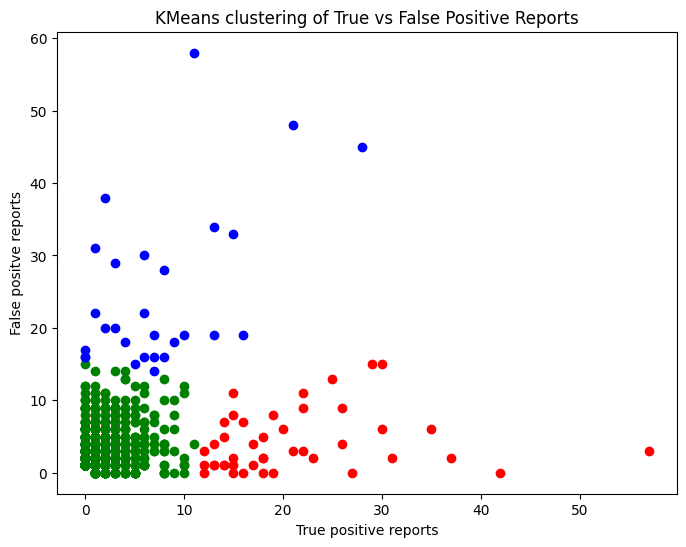

In [59]:
#tokenize, fit data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(selected_df[['real_truepositive', 'real_falsepositive']])

#define number of clusters
n_clusters = 3
#perform kmeans clustering, fit data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df)
#create new column to assign cluster labels
selected_df['cluster'] = kmeans.labels_
#define figure and dimensions
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
#set color pallete
colors = ['r', 'g','b']

#iterate through index and scatter plot, assign colors
for i in selected_df.index:
    ax.scatter(selected_df["real_truepositive"][i], selected_df['real_falsepositive'][i], color=colors[selected_df['cluster'][i]])

#set axis labels
ax.set_xlabel('True positive reports')
ax.set_ylabel('False positve reports')
#set title
ax.set_title('KMeans clustering of True vs False Positive Reports')
#show plot
plt.show()

KMeans clustering shows 3 distinct clusters.